In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plt
import seaborn as sns

In [2]:
# 5 chosen and identified data: TurId, Dato, Linjenavn,
# Kjøretøy_Kapasitet and Passasjerer_Ombord

In [3]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [5]:
df = pd.read_csv(url,sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [6]:
# Dropping non unique features
df = df.drop(["Område","Fylke","Kommune","Holdeplass_Fra","Holdeplass_Til","Linjetype","Linjefylke","Linjeretning",
              "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra",
              "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra",
              "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10


In [10]:
# These are the five features 
# Now I am going to set a condition for the heater to be inactive
# if the passengers are less than six

df['Heater']=df['Passasjerer_Ombord'] > 5
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord,Heater,Availability
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5,False,True
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5,False,True
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6,True,True
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10,True,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10,True,True


In [12]:
# Now to check if the bus is available for 20 people
# It means that the bus can not have more than for example 80 people
# because anything less than 80 will at least be 20

df['Availability']=df['Passasjerer_Ombord'] < 80
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord,Heater,Availability
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5,False,True
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5,False,True
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6,True,True
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10,True,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10,True,True


<AxesSubplot:>

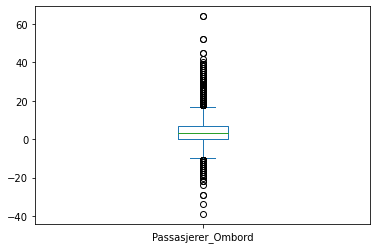

In [15]:
# In the visualization, I have plotted the passengers against the different IDs

df['Passasjerer_Ombord'].plot.box()

<AxesSubplot:>

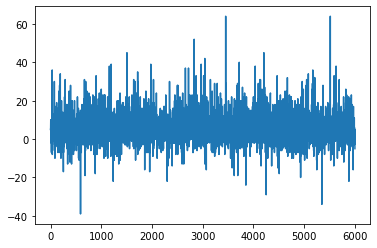

In [16]:
df['Passasjerer_Ombord'].plot.line()

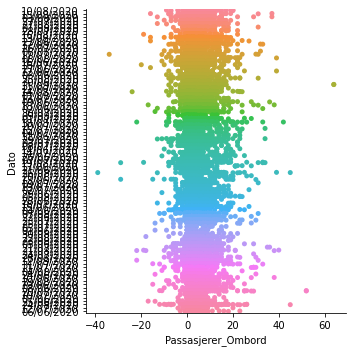

In [17]:
sns.catplot(x='Passasjerer_Ombord', y='Dato', data=df)